# Home work 1

https://mountain-hydrology-research-group.github.io/data-analysis/homework/HW1/

## Labs to go through(1.1&1.2):
https://mountain-hydrology-research-group.github.io/data-analysis/labs/lab1.1/

# Problem 1: Exploring Non-Stationary Flood Statistics
Download the files containing observed instantaneous peak flow data for the Sauk River and Skykomish Rivers in western WA. Note that annual peak flows are reported by water years (which cover Oct 1 of the previous year to September 30), so some years appear to have two values. (For clarification, the water years are shown in an additional column in the excel files.) For the purposes of this assignment, we will only consider peak flows by water year, and the years requested below refer to water years. (For example, the first flood reported in the Skykomish occurred on Oct 10, 1928 – this is the flood of water year 1929.)








In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math
from scipy.stats import norm

In [4]:
%matplotlib inline

In [5]:
#import dataset
df_sauk=pd.read_excel('Sauk_peak_WY1929_2017.xlsx')
df_skykomish=pd.read_excel('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

In [6]:
#rearrange the data so can be used in python
df_sk=pd.DataFrame.copy(df_sauk.loc[7:,:])
df_sk.columns=list(df_sauk.loc[5,:])
df_sk.head()

,water_year,peak_dt,peak_va,gage_ht
7,1929,1928-10-09 00:00:00,21800,9.33
8,1930,1930-02-05 00:00:00,15200,7.99
9,1931,1931-01-28 00:00:00,21800,9.32
10,1932,1932-02-26 00:00:00,68500,15.83
11,1933,1932-11-13 00:00:00,42500,12.62


In [7]:
df_skykomish.head()

,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08
3,1932-02-26,1932,83300,20.70
4,1932-11-13,1933,72500,19.50


A. Plot the data from the two streamflow sites as a time series from 1929-2009, with an open circle representing each peak flow value. Be sure to label your axes appropriately and label which graph is associated with which river. Describe qualitatively any changes you see in these records through time. Is there a common theme between the two sites?

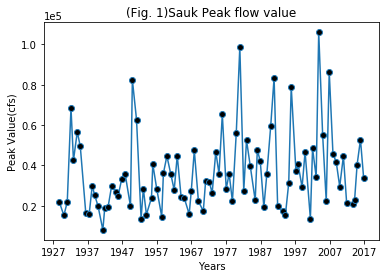

In [22]:
#plot df_sauk
plt.figure(1)
plt.plot(df_sk['peak_dt'],df_sk['peak_va'],'-o',markerfacecolor='black')

plt.xlabel('Years')
plt.ylabel('Peak Value(cfs)')
plt.title('(Fig. 1)Sauk Peak flow value')

#Change Y axis to sci notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

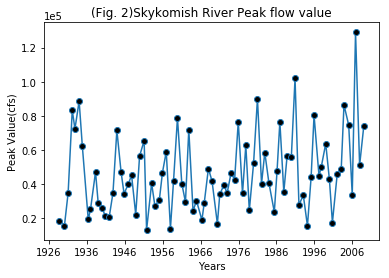

In [53]:
#plot df_skykimosh
plt.figure(2)
plt.plot(df_skykomish['date of peak'],df_skykomish['peak value (cfs)'],'-o',markerfacecolor='black')
plt.xlabel('Years')
plt.ylabel('Peak Value(cfs)')
plt.title('(Fig. 2)Skykomish River Peak flow value')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# <span style="color:red">Answer
According to the time trend plots for both sites, we can see an increasing trend through out the whole time period. The common theme for both sites is increasing peak flow values.

B. For the Sauk River only, graphically examine the entire timeseries and the peak flows occurring before and after 1975 (1929-1974, and 1975-2017). Prepare the following plots, taking care to make sure that they are well-labeled, readable, and convey meaningful information.
1. Histograms for the Sauk River for the entire period and each of the sub- periods (3 total).





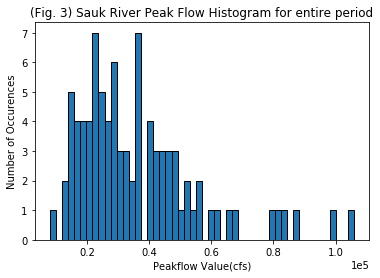

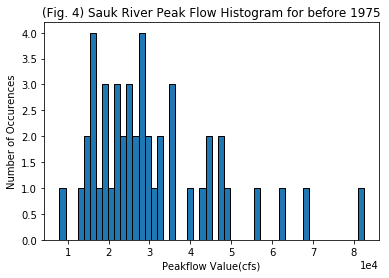

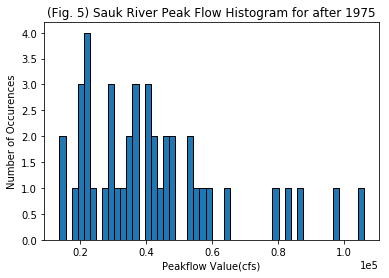

In [48]:
#Drawing the histgram for entire period
nbins=50
plt.figure(3)
plt.hist(list(df_sk['peak_va']),nbins,ec='black')
plt.title('(Fig. 3) Sauk River Peak Flow Histogram for entire period')
plt.xlabel('Peakflow Value(cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

#Create subsets for two sub periods
df_sk_before=df_sk[df_sk['water_year']<1975]
df_sk_after=df_sk[df_sk['water_year']>=1975]

#Plot sub periods
plt.figure(4)
plt.hist(list(df_sk_before['peak_va']),nbins,ec='black')
plt.title('(Fig. 4) Sauk River Peak Flow Histogram for before 1975')
plt.xlabel('Peakflow Value(cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

plt.figure(5)
plt.hist(list(df_sk_after['peak_va']),nbins,ec='black')
plt.title('(Fig. 5) Sauk River Peak Flow Histogram for after 1975')
plt.xlabel('Peakflow Value(cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

2. Quantile plots using the Cunnane plotting position (see section 2.1.3 in H&H) for the Sauk River for the entire period, and for each sub-period. The 3 plots should be plotted on one graph, with different line types and a legend.

In [44]:
#The quantile_fn function was adopted from the Lab 1.1
def quantile_fn(data):

    # Create an array of ordered data using the sorted() function.
    ordered_data = sorted(data)
    
    # Define the length of the ordered_data array using the len() function.
    n = len(ordered_data)

    # Assign a rank and plotting position to each data point using a for loop.
    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    return ordered_data, plotting_position

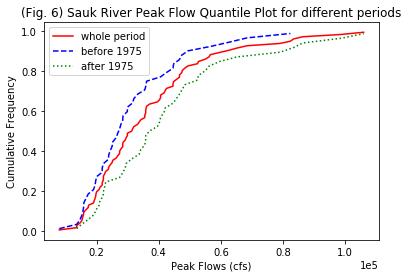

In [60]:
#Quantile plots for the 3 plots
#Generate data for plotting, _w for whole period, _b for before 1975, _a for after 1975
sk_data_w,sk_plotting_w=quantile_fn(list(df_sk['peak_va']))
sk_data_b,sk_plotting_b=quantile_fn(list(df_sk_early['peak_va']))
sk_data_a,sk_plotting_a=quantile_fn(list(df_sk_later['peak_va']))

plt.figure(6)
plt.plot(sk_data_w, sk_plotting_w,'r',linestyle='-',label='whole period')
plt.plot(sk_data_b, sk_plotting_b,'b',linestyle='--',label='before 1975')
plt.plot(sk_data_a, sk_plotting_a,'g',linestyle=':',label='after 1975')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 6) Sauk River Peak Flow Quantile Plot for different periods')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc='best')

3. PDFs for the Sauk River for the entire period, and for each sub-period. The 3 plots should be plotted on one graph, with different line types and a legend.

In [61]:
#The quantile_fn function was adopted from the Lab 1.1
def pdf_fn(data, nbins):
    
    # Using the hist() function and the function arguments, find:
    # counts (an array): the number of data points for each bin
    # bins (an array): the location of the left side of each bin and the right side of the last bin
    # patches (a list): the style properties of the histogram. We will not use these, but hist() returns them.
    counts, bins, patches = plt.hist(data, nbins)
    
    # Close the histogram using the close() function so that it does not display.
    plt.close()
    
    # Create an array with the location of the center of each bin.
    width = bins[2]-bins[1]
    centers = bins + width/2
    # plt.hist() returns the right side of the last bin, which we don't want in the centers array.
    # To get rid of this, first convert the centers array to a list.
    centers_list = np.array(centers).tolist()
    # Then, remove the last number from the list.
    centers_list.remove(centers_list[len(centers_list)-1])
      # why is there a -1 at the end?  Is that because the counters start at 0 in python?  

    # Calculate the area of each bin.
    areas = [c * width for c in counts]
    # Calculate the total area using the sum() function.
    area_under_curve = sum(areas)

    # Calculate the fraction of area vs counts for each bin.
    fractions = [c / area_under_curve for c in counts]
    
    # Return a list of the location of the center of each bin and the fraction of area vs counts for each bin.
    return centers_list, fractions

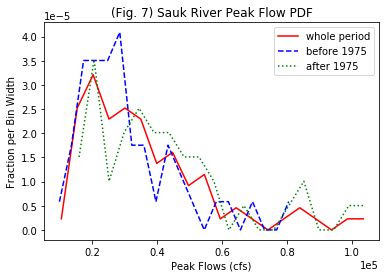

In [67]:
nbins = 20
#Generate data for the plots,_w for whole period, _b for before, _a for after
centers_list_w, fractions_w = pdf_fn(list(df_sk['peak_va']), nbins)
centers_list_b, fractions_b = pdf_fn(list(df_sk_before['peak_va']), nbins)
centers_list_a, fractions_a = pdf_fn(list(df_sk_after['peak_va']), nbins)

# Plot PDF.
plt.figure(7)
plt.plot(centers_list_w, fractions_w,'r',linestyle='-',label='whole period')
plt.plot(centers_list_b, fractions_b,'b',linestyle='--',label='before 1975')
plt.plot(centers_list_a, fractions_a,'g',linestyle=':',label='after 1975')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 7) Sauk River Peak Flow PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

<span style="color:red">4. For each of the sub-groupings in 2, estimate the sample mean and standard deviation. Assuming a Gaussian distribution, add theoretical curves to the plots in 2 for Gaussian CDFs that have the same means and standard deviations as calculated for the actual data. (The graph should now have 6 lines – label carefully.)

In [66]:
#Generate data for the CDF plots
#again, _w for whole period, _b for before 1975, _a for after 1975
def make_normal_dist_cdf(data):
    
    # Calculate the mean and standard deviation of the data using the 
    # statistics module.
    mean = stats.mean(data)
    sd = stats.stdev(data)
    
    # Find the range of the data.
    n = len(data)
    num = int(data[n-1]-data[0])
    
    return np.linspace(data[0], data[n-1], num), mean, sd

# Call CDF function for data.
ordered_sauk_w, mean_w, sd_w = make_normal_dist_cdf(sk_data_w)
ordered_sauk_b, mean_b, sd_b = make_normal_dist_cdf(sk_data_b)
ordered_sauk_a, mean_a, sd_a = make_normal_dist_cdf(sk_data_a)

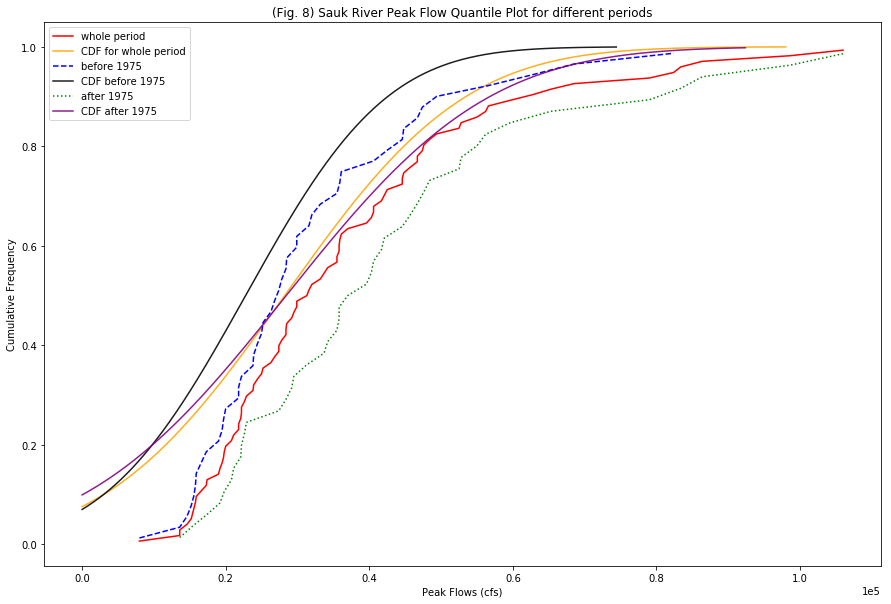

In [75]:
#Quantile plots for the 3 plots
#Generate data for plotting, _w for whole period, _b for before 1975, _a for after 1975
plt.figure(8)
plt.figure(figsize=(15,10))
plt.plot(sk_data_w, sk_plotting_w,'r',linestyle='-',label='whole period')
plt.plot(norm.cdf(ordered_sauk_w, mean_w, sd_w), color='orange', label='CDF for whole period',alpha=30)
plt.plot(sk_data_b, sk_plotting_b,'b',linestyle='--',label='before 1975')
plt.plot(norm.cdf(ordered_sauk_b, mean_b, sd_b), color='black', label='CDF before 1975',alpha=30)
plt.plot(sk_data_a, sk_plotting_a,'g',linestyle=':',label='after 1975')
plt.plot(norm.cdf(ordered_sauk_a, mean_a, sd_a), color='purple', label='CDF after 1975',alpha=30)
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 8) Sauk River Peak Flow Quantile Plot for different periods')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc='best')

5. Box and whisker plots for each of the periods above (total, pre-1975 and 1975-present), with appropriate labels.

([<matplotlib.axis.XTick at 0x16da3ef0b00>,
 <a list of 3 Text xticklabel objects>)

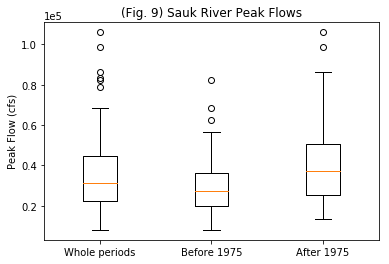

In [87]:
plt.figure(9)
plt.boxplot((list(df_sk['peak_va']),list(df_sk_before['peak_va']),list(df_sk_after['peak_va'])))
plt.ylabel('Peak Flow (cfs)')
plt.title('(Fig. 9) Sauk River Peak Flows')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks([1, 2, 3], ['Whole periods', 'Before 1975', 'After 1975'])

C. Based on the plots you have created, discuss whether or not you think a change has occurred in the peak flows around 1975. Be sure to reference your plots (Fig. 1, Fig. 2, etc.) when you discuss them.

# <span style="color:red">Answer
 There is a change occurred in the peak flows around 1975. Generally speaking, the peak flows around 1975 increases at the point. Dividing by 1975, we can see that the overall peak flows before 1975 are much lower than after 1975 (by Fig. 9), which suggests that the peak flows before that time point has a lower average and lower maximum. However when comparing the CDF trend for before/after 1975 (by Fig. 8) we can tell that the trend after 1975 is very near to the whole period change, which suggests that there is a change before 1975 comparing to the whole periods.

# Problem 2: Fun with fake data!

One of the most reliable tests of any statistical method or technique is to try it out on data where you know the answer to see if the methodology gives you the result you expect. The best way to get data that truly understand is to make it up yourself.






A. Make up 1000 numbers with a normal distribution, 1000 numbers with a log-normal distribution, and 1000 numbers with a uniform distribution. For each, make the mean be 60 and standard deviation be 40. (You’ll need to think about what the interval should be for the uniform distribution.)


In [90]:
%matplotlib inline

In [106]:
size = 1000
mean = 60
sd = 40
#create numbers with a normal distribution
data_normal = np.random.normal(mean, sd, size)

#create numbers with a log-normal distribution
# Find the mean and standard deviation for ln(RandomData)
mu = math.log(mean**2 / math.sqrt(mean**2 + sd**2))
sigma = math.sqrt(math.log((mean**2 + sd**2) / (mean**2)))
data_lognormal = np.random.lognormal(mu, sigma, size)

#create numbers with a uniform distribution
a = mean - sd*math.sqrt(3)
b = mean + sd*math.sqrt(3)
data_uniform = np.random.uniform(a, b, size)

B. Create descriptive plots (histogram, box and whiskers, quantile plots, PDFs) using all of your samples and compare results from the three distributions. Discuss how you can tell the distributions apart.

Text(0,0.5,'Number of Occurences')

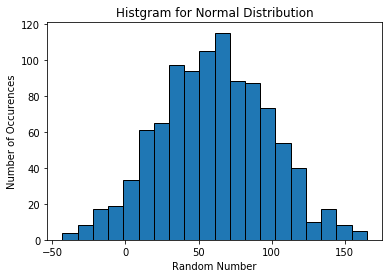

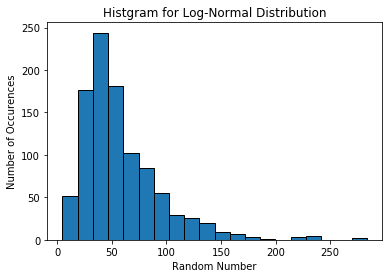

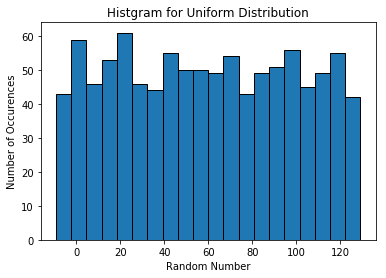

In [119]:
nbins=20
#Plots for normal Distribution
plt.figure(1)
plt.hist(data_normal, nbins, ec="black")
plt.title('Histgram for Normal Distribution')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

plt.figure(2)
plt.hist(data_lognormal, nbins, ec="black")
plt.title('Histgram for Log-Normal Distribution')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

plt.figure(3)
plt.hist(data_uniform, nbins, ec="black")
plt.title('Histgram for Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')




([<matplotlib.axis.XTick at 0x16da3b13c18>,
 <a list of 3 Text xticklabel objects>)

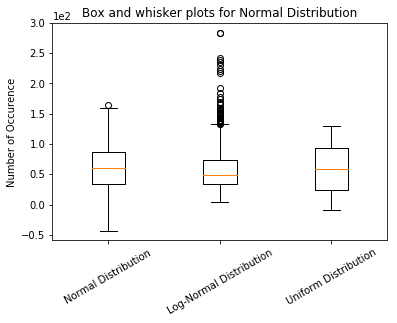

In [123]:
#Plot for box and whiskers plots
plt.boxplot((data_normal,data_lognormal,data_uniform))
plt.ylabel('Number of Occurence')
plt.title('Box and whisker plots for Normal Distribution')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks([1, 2, 3], ['Normal Distribution', 'Log-Normal Distribution', 'Uniform Distribution'],rotation=30)

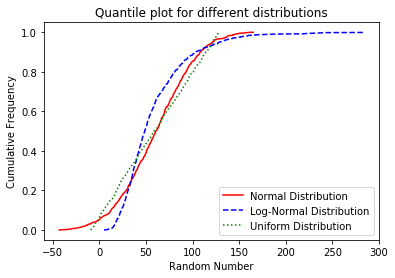

In [127]:
#Plot for Quantile plots
nor_data,nor_plotting=quantile_fn(data_normal)
lognor_data,lognor_plotting=quantile_fn(data_lognormal)
uni_data,uni_plotting=quantile_fn(data_uniform)

plt.plot(nor_data, nor_plotting,'r',linestyle='-',label='Normal Distribution')
plt.plot(lognor_data, lognor_plotting,'b',linestyle='--',label='Log-Normal Distribution')
plt.plot(uni_data, uni_plotting,'g',linestyle=':',label='Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Cumulative Frequency')
plt.title('Quantile plot for different distributions')
plt.legend(loc='best')

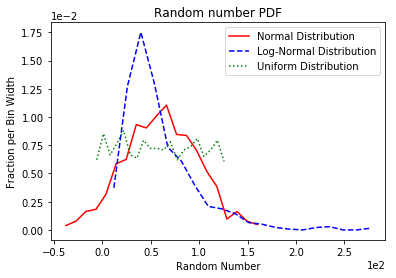

In [129]:
#Generate PDF parameters and plots
nbins = 20
#Generate data for the plots,_w for whole period, _b for before, _a for after
cl_nor, frac_nor = pdf_fn((data_normal), nbins)
cl_log, frac_log = pdf_fn((data_lognormal), nbins)
cl_uni, frac_uni = pdf_fn((data_uniform), nbins)

# Plot PDF.
plt.plot(cl_nor, frac_nor,'r',linestyle='-',label='Normal Distribution')
plt.plot(cl_log, frac_log,'b',linestyle='--',label='Log-Normal Distribution')
plt.plot(cl_uni, frac_uni,'g',linestyle=':',label='Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Fraction per Bin Width')
plt.title('Random number PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')


C. Repeat with just 10 numbers from each set, and again with 25 and 100. For each of these, can you tell the distributions apart? What is the sample mean and standard deviation for each?

In [135]:
import random
#Randomly pick numbers from each set
#10
data_normal10 = random.sample(list(data_normal), 10) 
data_lognormal10 = random.sample(list(data_lognormal), 10) 
data_uniform10 = random.sample(list(data_uniform), 10) 

#25
data_normal25 = random.sample(list(data_normal), 25) 
data_lognormal25 = random.sample(list(data_lognormal), 25) 
data_uniform25 = random.sample(list(data_uniform), 25) 

#100
data_normal100 = random.sample(list(data_normal), 100) 
data_lognormal100 = random.sample(list(data_lognormal), 100) 
data_uniform100 = random.sample(list(data_uniform), 100) 

In [147]:
#Calculate mean and stdev
print('Normal Distribution: \n 10 numbers:\n mean=',stats.mean(data_normal10),'\n stdev=',stats.stdev(data_normal10),
      '\n 25 numbers:\n mean=',stats.mean(data_normal25),'\n stdev=',stats.stdev(data_normal25),
      '\n 100 numbers:\n mean=',stats.mean(data_normal100),'\n stdev=',stats.stdev(data_normal100))

Normal Distribution: 
 10 numbers:
 mean= 52.6274006164953 
 stdev= 27.288302848582855 
 25 numbers:
 mean= 68.07679081195407 
 stdev= 35.0991111470336 
 100 numbers:
 mean= 60.51789529529741 
 stdev= 35.62545863330837


In [148]:
print('Log-Normal Distribution: \n 10 numbers:\n mean=',stats.mean(data_lognormal10),'\n stdev=',stats.stdev(data_lognormal10),
      '\n 25 numbers:\n mean=',stats.mean(data_lognormal25),'\n stdev=',stats.stdev(data_lognormal25),
      '\n 100 numbers:\n mean=',stats.mean(data_lognormal100),'\n stdev=',stats.stdev(data_lognormal100))

Log-Normal Distribution: 
 10 numbers:
 mean= 50.71916448572885 
 stdev= 31.038724984999057 
 25 numbers:
 mean= 61.11881520438361 
 stdev= 29.550986766587624 
 100 numbers:
 mean= 63.67690893039423 
 stdev= 45.76731295445127


In [149]:
print('Uniform Distribution: \n 10 numbers:\n mean=',stats.mean(data_uniform10),'\n stdev=',stats.stdev(data_uniform10),
      '\n 25 numbers:\n mean=',stats.mean(data_uniform25),'\n stdev=',stats.stdev(data_uniform25),
      '\n 100 numbers:\n mean=',stats.mean(data_uniform100),'\n stdev=',stats.stdev(data_uniform100))

Uniform Distribution: 
 10 numbers:
 mean= 45.26956703001532 
 stdev= 42.54359803748578 
 25 numbers:
 mean= 44.73260049090396 
 stdev= 31.50269396287836 
 100 numbers:
 mean= 61.56390580685333 
 stdev= 39.02550621885396


To using visualization tools I selected PDF plot to help comparing different distributions under different sample size as showed below

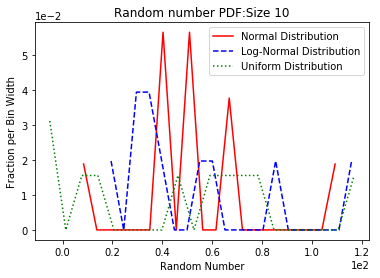

In [152]:
#Size10
#Generate PDF parameters and plots
nbins = 20
#Generate data for the plots,_w for whole period, _b for before, _a for after
cl_nor, frac_nor = pdf_fn((data_normal10), nbins)
cl_log, frac_log = pdf_fn((data_lognormal10), nbins)
cl_uni, frac_uni = pdf_fn((data_uniform10), nbins)

# Plot PDF.
plt.plot(cl_nor, frac_nor,'r',linestyle='-',label='Normal Distribution')
plt.plot(cl_log, frac_log,'b',linestyle='--',label='Log-Normal Distribution')
plt.plot(cl_uni, frac_uni,'g',linestyle=':',label='Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Fraction per Bin Width')
plt.title('Random number PDF:Size 10')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

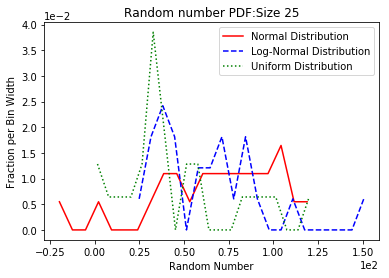

In [154]:
#Size25
#Generate PDF parameters and plots
nbins = 20
#Generate data for the plots,_w for whole period, _b for before, _a for after
cl_nor, frac_nor = pdf_fn((data_normal25), nbins)
cl_log, frac_log = pdf_fn((data_lognormal25), nbins)
cl_uni, frac_uni = pdf_fn((data_uniform25), nbins)

# Plot PDF.
plt.plot(cl_nor, frac_nor,'r',linestyle='-',label='Normal Distribution')
plt.plot(cl_log, frac_log,'b',linestyle='--',label='Log-Normal Distribution')
plt.plot(cl_uni, frac_uni,'g',linestyle=':',label='Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Fraction per Bin Width')
plt.title('Random number PDF:Size 25')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

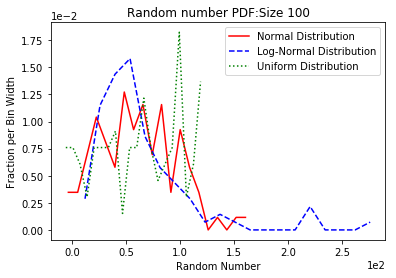

In [155]:
#Size100
#Generate PDF parameters and plots
nbins = 20
#Generate data for the plots,_w for whole period, _b for before, _a for after
cl_nor, frac_nor = pdf_fn((data_normal100), nbins)
cl_log, frac_log = pdf_fn((data_lognormal100), nbins)
cl_uni, frac_uni = pdf_fn((data_uniform100), nbins)

# Plot PDF.
plt.plot(cl_nor, frac_nor,'r',linestyle='-',label='Normal Distribution')
plt.plot(cl_log, frac_log,'b',linestyle='--',label='Log-Normal Distribution')
plt.plot(cl_uni, frac_uni,'g',linestyle=':',label='Uniform Distribution')
plt.xlabel('Random Number')
plt.ylabel('Fraction per Bin Width')
plt.title('Random number PDF:Size 100')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

# <span style="color:red">Answer

All the means and standard deviations were calculated above. For smaller size of subsets it is hard to tell different distributions apart, as the sample size increases, different distribution start to present some different patterns.


D. Discuss the difference between a sample population and the true population.

# <span style="color:red">Answer

The sample population consist of part of the true population, the size of the sample population is always smaller than the true population.

The more sample population size near the true population, the more accurate distribution prediction on the true population will be made based on the sample population.